# OLYMPICS DATA EXPLORATION

## About the data
We have data on olympics participants, teams, events, and medals spanning 120 years (from 1896 to 2016). The games are labelled by season, summer or winter. Winter olympics were first introduced in 1924. Prior to that, we only have data on summer olympics. 
Due to the nature of the task, I had to make certain assumptions about my client and the insights that would be of interest to them. 
For the purpose of this assignment, my client is a sports apparel company, interested in sponsoring athletes to showcase their products and expand potential customer base for the brand. I decided it would be beneficial to examine historical olympics data to potentially identify any emerging trends in the data that can point to specific sports, and NOCs that have recently emerged and are gaining popularity in their home country. The medal count and type as well as specific athletes and teams will be of particular interest for this task. closely tracking the olympics for any emerging trends like sports or events that have increased popularity in certain countries

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import scipy
import plotly
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading in data
athletes = pd.read_csv("/Users/tatevgomtsyan/athlete_events.csv")
athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


some team names are poorly formatted, but still register in the correct NOC code, so we'll just focus on NOC instead of team name

In [3]:
# checking the size of df
athletes.shape

(271116, 15)

### Initial Analysis:

In [4]:
# let's see what countries are present
athletes['NOC'].unique()

array(['CHN', 'DEN', 'NED', 'USA', 'FIN', 'NOR', 'ROU', 'EST', 'FRA',
       'MAR', 'ESP', 'EGY', 'IRI', 'BUL', 'ITA', 'CHA', 'AZE', 'SUD',
       'RUS', 'ARG', 'CUB', 'BLR', 'GRE', 'CMR', 'TUR', 'CHI', 'MEX',
       'URS', 'NCA', 'HUN', 'NGR', 'ALG', 'KUW', 'BRN', 'PAK', 'IRQ',
       'UAR', 'LIB', 'QAT', 'MAS', 'GER', 'CAN', 'IRL', 'AUS', 'RSA',
       'ERI', 'TAN', 'JOR', 'TUN', 'LBA', 'BEL', 'DJI', 'PLE', 'COM',
       'KAZ', 'BRU', 'IND', 'KSA', 'SYR', 'MDV', 'ETH', 'UAE', 'YAR',
       'INA', 'PHI', 'SGP', 'UZB', 'KGZ', 'TJK', 'EUN', 'JPN', 'CGO',
       'SUI', 'BRA', 'FRG', 'GDR', 'MON', 'ISR', 'URU', 'SWE', 'ISV',
       'SRI', 'ARM', 'CIV', 'KEN', 'BEN', 'UKR', 'GBR', 'GHA', 'SOM',
       'LAT', 'NIG', 'MLI', 'AFG', 'POL', 'CRC', 'PAN', 'GEO', 'SLO',
       'CRO', 'GUY', 'NZL', 'POR', 'PAR', 'ANG', 'VEN', 'COL', 'BAN',
       'PER', 'ESA', 'PUR', 'UGA', 'HON', 'ECU', 'TKM', 'MRI', 'SEY',
       'TCH', 'LUX', 'MTN', 'CZE', 'SKN', 'TTO', 'DOM', 'VIN', 'JAM',
       'LBR', 'SUR',

In [5]:
urs_participations = athletes[athletes['NOC'] == 'URS']
urs_participation_years = urs_participations['Year'].unique()
urs_participation_years

array([1964, 1980, 1972, 1988, 1960, 1976, 1968, 1956, 1952, 1984])

In [6]:
# lets check if there are any years the olympics didn't occur 

# expected Olympic years 1896 to 2020
expected_years = [1896, 1900, 1904, 1906, 1908, 1912, 1916, 1920, 1924, 1928, 1932, 1936, 1940, 1944, 1948,
                  1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992, 1994,
                  1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016]

# missing years
missing_years = set(expected_years) - set(athletes['Year'].unique())

print("Years with no Olympics:", sorted(missing_years))

Years with no Olympics: [1916, 1940, 1944]


In [7]:
print(athletes['Year'].unique())
#verified above claim

[1992 2012 1920 1900 1988 1994 1932 2002 1952 1980 2000 1996 1912 1924
 2014 1948 1998 2006 2008 2016 2004 1960 1964 1984 1968 1972 1936 1956
 1928 1976 2010 1906 1904 1908 1896]


#### **Things to point out:**
- The first Olympics was in 1896 and the last in the dataset is 2016. No Games occurred in 1916, 1940, 1944 due to WWI and WWII.
- The Soviet Union (URS) participated in Olympic Games from 1952 to 1988. After URS fell, Russia (RUS) took its place in the games. Combining the two would be extensive and was not important for my case today.
- In a similar manner, Germany existed as both West Germany (Federal Republic of Germany or FRG) and East Germany (German Democratic Republic or GDR). FRG and GDR participated from 1968 until the fall of the Berlin Wall. After 1988, the data only contains modern day Germany as GER. 
- Yugoslavia participated from 1918-1992 until its demise. This is unaccounted for in the analysis, left as is.

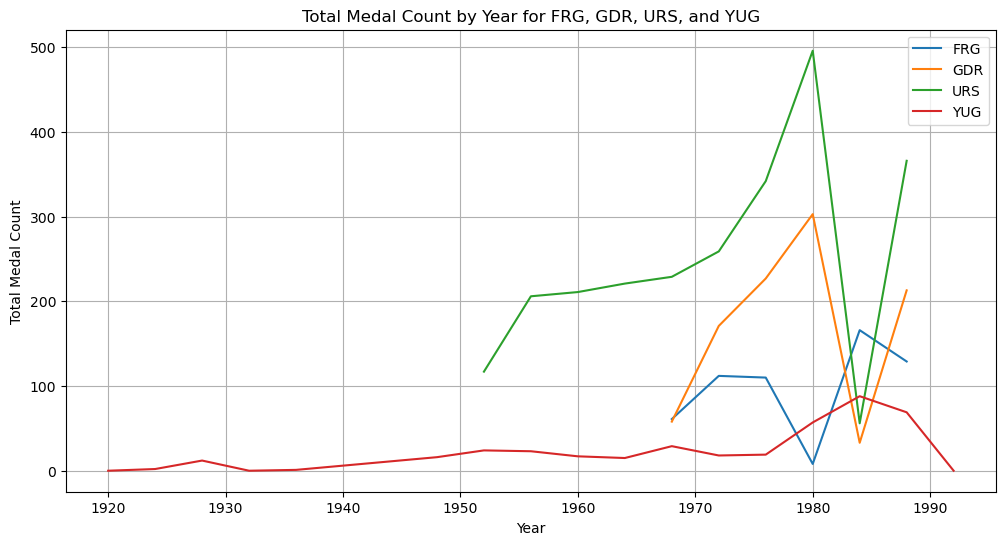

In [8]:
# performance of FRG, GDR, URS, and YUG before their terminations
selected_countries = ['FRG', 'GDR', 'URS', 'YUG']
filtered_data = athletes[athletes['NOC'].isin(selected_countries)]

total_medals_by_year_country = filtered_data.groupby(['Year', 'NOC'])['Medal'].count().unstack()

# total medal count by year for each country
plt.figure(figsize=(12, 6))
for country in selected_countries:
    plt.plot(total_medals_by_year_country.index, total_medals_by_year_country[country], label=country)

plt.title('Total Medal Count by Year for FRG, GDR, URS, and YUG')
plt.xlabel('Year')
plt.ylabel('Total Medal Count')
plt.legend()
plt.grid(True)
plt.show()


While Yugoslavia's participation spans almost a decade, its performance was low and steady, only nearing 100 count around 1985, until falling sharply during its breakup. In contrast, the Soviet Union participated for less than 40 years and reached immense success. Granted, there were 15 countries encompassed by URS and only 7 in YUG. East Germany outperformed the West during their tenures. It would be interesting to compare this to performance of modern day countries who broke free from URS and YUG.

In [9]:
# we should combine all german NOCs to just present as GER

# Identify 'FRG' or 'GDR' in the 'NOC' column and replace with 'GER'
athletes['NOC'] = athletes['NOC'].replace({'FRG': 'GER', 'GDR': 'GER'})

In [10]:
# did Germany's performance significantly change before and after the fall of the Berlin Wall?

from scipy.stats import ttest_ind

# year of the fall of the Berlin Wall
fall_of_berlin_wall_year = 1989

# Germany before and after 1989
medals_before_berlin_wall = athletes.loc[
    (athletes['NOC'] == 'GER') & (athletes['Year'] <= fall_of_berlin_wall_year),
    ['Year', 'Medal']
]

medals_after_berlin_wall = athletes.loc[
    (athletes['NOC'].str.lower() == 'ger') & (athletes['Year'] > fall_of_berlin_wall_year),
    ['Year', 'Medal']
]

# total medal count per year
total_medals_before_berlin_wall = medals_before_berlin_wall.groupby('Year')['Medal'].count()
total_medals_after_berlin_wall = medals_after_berlin_wall.groupby('Year')['Medal'].count()

# Two-Sample T-Test
t_stat, p_value = ttest_ind(total_medals_before_berlin_wall, total_medals_after_berlin_wall, equal_var=False)

# Significance Level
alpha = 0.05

# Interpret Results
if p_value < alpha:
    print("Reject the null hypothesis. There is evidence that the total medal count changed before and after the fall of the Berlin Wall.")
else:
    print("P_value > alpha. We fail to reject the null hypothesis. There is not enough evidence to suggest a significant change in Germany's performance post-Berlin Wall")
p_value

P_value > alpha. We fail to reject the null hypothesis. There is not enough evidence to suggest a significant change in Germany's performance post-Berlin Wall


0.29043371068814466

## Data Cleaning

In [11]:
athletes.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

Off the bat, we recognize that there is missing data in a number of columns including age, height, and weight which is all demographic information. Since it will prove useful for the exploratory analyhsis to look at such factors, and since the majority of the data is still present, we'll keep these columns and just keep iin mind that our findings may not be representative of the whole population, but isnteade of a sample. 

Instead, we can impute the rows with missing values to equal the median of each category in order to avoid issues caused by NaNs and ensure that the data is not heavily skewed, as a mean would do. 

In [12]:
# imputing NaNs
athletes['Height'].fillna(athletes['Height'].median(), inplace=True)
athletes['Weight'].fillna(athletes['Weight'].median(), inplace=True)
athletes['Age'].fillna(athletes['Age'].median(), inplace=True)
#athletes['Medal'].fillna('No Medal', inplace=True)

Games column doesn't give us additional information we don't already have. The year and season variables are identical and is easier to use in EDA. We can drop the games column. 

In [13]:
athletes = athletes.drop(columns=['Games'])

In [14]:
# Sort the df by 'Year' in ascending order
athletes = athletes.sort_values(by='Year', ascending=True).reset_index(drop=True)

In [15]:
athletes.info() # tells us data type of each variable 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     271116 non-null  float64
 4   Height  271116 non-null  float64
 5   Weight  271116 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Year    271116 non-null  int64  
 9   Season  271116 non-null  object 
 10  City    271116 non-null  object 
 11  Sport   271116 non-null  object 
 12  Event   271116 non-null  object 
 13  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 29.0+ MB


In [16]:
# data type conversions
athletes['Age'] = athletes['Age'].astype(int)
athletes['Year'] = athletes['Year'].astype(int)
athletes['ID'] = athletes['ID'].astype(str)

### Overall Statistics:

Total number of records (rows) in the dataset.
Number of unique cities, athletes, and events.
Distribution of data across different sports and disciplines.

correlations:
age - medal 
age - year 
height/weight - year 

In [17]:
# number of rows and columns (size of dataset)
athletes.shape

(271116, 14)

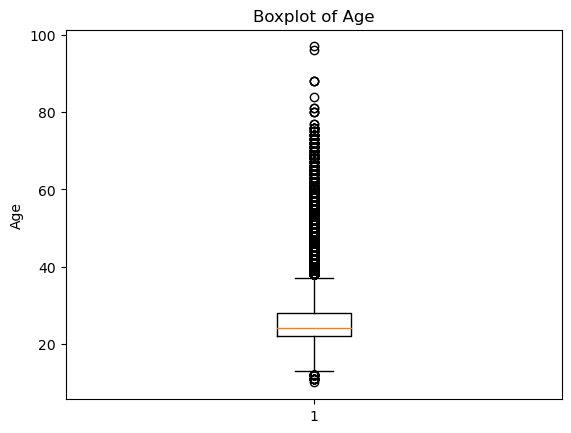

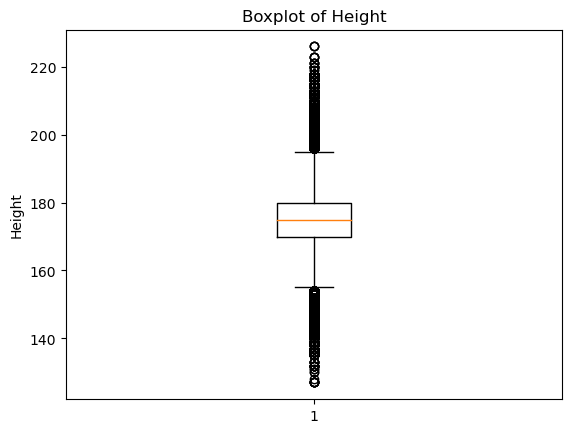

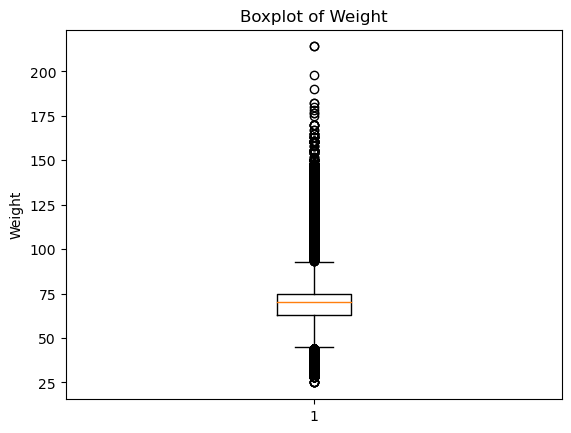

In [18]:
# Descriptive Summaries of Numerical Variables

plt.boxplot(athletes['Age'])
plt.title('Boxplot of Age')
plt.ylabel('Age')
plt.show()

plt.boxplot(athletes['Height'])
plt.title('Boxplot of Height')
plt.ylabel('Height')
plt.show()

plt.boxplot(athletes['Weight'])
plt.title('Boxplot of Weight')
plt.ylabel('Weight')
plt.show()


In [19]:
# Basic statistical summary
print(athletes.describe())

                 Age        Height         Weight           Year
count  271116.000000  271116.00000  271116.000000  271116.000000
mean       25.502493     175.26374      70.539500    1978.378480
std         6.287361       9.27917      12.578184      29.877632
min        10.000000     127.00000      25.000000    1896.000000
25%        22.000000     170.00000      63.000000    1960.000000
50%        24.000000     175.00000      70.000000    1988.000000
75%        28.000000     180.00000      75.000000    2002.000000
max        97.000000     226.00000     214.000000    2016.000000


In [20]:
athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
0,107607,Fritz Richard Gustav Schuft,M,19,175.0,70.0,Germany,GER,1896,Summer,Athina,Gymnastics,Gymnastics Men's Pommelled Horse,NaN
1,122526,Pierre Alexandre Tuffri,M,19,175.0,70.0,France,FRA,1896,Summer,Athina,Athletics,Athletics Men's Triple Jump,Silver
2,122526,Pierre Alexandre Tuffri,M,19,175.0,70.0,France,FRA,1896,Summer,Athina,Athletics,Athletics Men's Long Jump,NaN
3,12563,Conrad Helmut Fritz Bcker,M,25,175.0,70.0,Germany,GER,1896,Summer,Athina,Gymnastics,Gymnastics Men's Horse Vault,NaN
4,12563,Conrad Helmut Fritz Bcker,M,25,175.0,70.0,Germany,GER,1896,Summer,Athina,Gymnastics,Gymnastics Men's Parallel Bars,NaN


### Summer and Winter data

In [21]:
# split athletes df into two: 1 for summer games, 1 for winter 

summer = athletes[athletes['Season'] == 'Summer']
winter = athletes[athletes['Season'] == 'Winter']

In [22]:
print(summer['Sport'].unique())

['Gymnastics' 'Athletics' 'Shooting' 'Tennis' 'Fencing' 'Swimming'
 'Cycling' 'Weightlifting' 'Wrestling' 'Croquet' 'Water Polo' 'Sailing'
 'Rowing' 'Tug-Of-War' 'Polo' 'Equestrianism' 'Rugby' 'Football' 'Archery'
 'Cricket' 'Golf' 'Basque Pelota' 'Boxing' 'Lacrosse' 'Diving' 'Roque'
 'Hockey' 'Figure Skating' 'Jeu De Paume' 'Motorboating' 'Racquets'
 'Art Competitions' 'Modern Pentathlon' 'Ice Hockey' 'Alpinism' 'Canoeing'
 'Basketball' 'Handball' 'Aeronautics' 'Volleyball' 'Judo'
 'Synchronized Swimming' 'Rhythmic Gymnastics' 'Table Tennis' 'Badminton'
 'Baseball' 'Softball' 'Beach Volleyball' 'Triathlon' 'Taekwondo'
 'Trampolining' 'Rugby Sevens']


In [23]:
print(winter['Sport'].unique())

['Cross Country Skiing' 'Nordic Combined' 'Ice Hockey' 'Alpinism'
 'Bobsleigh' 'Military Ski Patrol' 'Ski Jumping' 'Curling' 'Speed Skating'
 'Figure Skating' 'Skeleton' 'Alpine Skiing' 'Biathlon' 'Luge'
 'Freestyle Skiing' 'Short Track Speed Skating' 'Snowboarding']


In [24]:
print(summer['Event'].value_counts())

Event
Football Men's Football                                5733
Hockey Men's Hockey                                    3958
Water Polo Men's Water Polo                            3358
Basketball Men's Basketball                            3280
Cycling Men's Road Race, Individual                    2947
                                                       ... 
Archery Men's Target Archery, 33 metres, Individual       2
Sailing Mixed 18 foot                                     2
Croquet Mixed Doubles                                     2
Archery Men's Target Archery, 50 metres, Individual       2
Aeronautics Mixed Aeronautics                             1
Name: count, Length: 651, dtype: int64


In [25]:
print(winter['Event'].value_counts())

Event
Ice Hockey Men's Ice Hockey            4702
Bobsleigh Men's Four                   1715
Alpine Skiing Men's Slalom             1593
Alpine Skiing Men's Giant Slalom       1535
Alpine Skiing Men's Downhill           1164
                                       ... 
Speed Skating Men's Allround             23
Freestyle Skiing Women's Halfpipe        23
Snowboarding Women's Slopestyle          23
Freestyle Skiing Women's Slopestyle      22
Alpinism Mixed Alpinism                  21
Name: count, Length: 119, dtype: int64


**Most popular events:**

Summer - football, hockey, water polo, bball, cycling

Winter - ice hockey, bobsleigh, alpine skiing 

### Summer & Winter Olympics Participation Stats

In [26]:
print("Summer Olympics:")
summer.head()

Summer Olympics:


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
0,107607,Fritz Richard Gustav Schuft,M,19,175.0,70.0,Germany,GER,1896,Summer,Athina,Gymnastics,Gymnastics Men's Pommelled Horse,NaN
1,122526,Pierre Alexandre Tuffri,M,19,175.0,70.0,France,FRA,1896,Summer,Athina,Athletics,Athletics Men's Triple Jump,Silver
2,122526,Pierre Alexandre Tuffri,M,19,175.0,70.0,France,FRA,1896,Summer,Athina,Athletics,Athletics Men's Long Jump,NaN
3,12563,Conrad Helmut Fritz Bcker,M,25,175.0,70.0,Germany,GER,1896,Summer,Athina,Gymnastics,Gymnastics Men's Horse Vault,NaN
4,12563,Conrad Helmut Fritz Bcker,M,25,175.0,70.0,Germany,GER,1896,Summer,Athina,Gymnastics,Gymnastics Men's Parallel Bars,NaN


In [27]:
print("Winter Olympics:")
winter.head()

Winter Olympics:


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
16799,105349,Jonas Elis Sandin,M,22,175.0,70.0,Sweden,SWE,1924,Winter,Chamonix,Cross Country Skiing,Cross Country Skiing Men's 18 kilometres,NaN
16802,40532,Jules Alexandre Girard-Bille,M,24,175.0,70.0,Switzerland,SUI,1924,Winter,Chamonix,Nordic Combined,Nordic Combined Men's Individual,NaN
16812,83350,"Duncan Brown ""Dunc"" Munro",M,23,173.0,86.0,Canada,CAN,1924,Winter,Chamonix,Ice Hockey,Ice Hockey Men's Ice Hockey,Gold
16852,74134,George Herbert Leigh Mallory,M,37,175.0,70.0,Great Britain,GBR,1924,Winter,Chamonix,Alpinism,Alpinism Mixed Alpinism,Gold
16892,106776,Eduard Scherrer,M,33,175.0,70.0,Switzerland-1,SUI,1924,Winter,Chamonix,Bobsleigh,Bobsleigh Men's Four/Five,Gold


In [28]:
# make new binary medal column 
athletes['Received_Medal'] = athletes['Medal'].notna().astype(int)

In [29]:
# calculations: total participants, # of male, # of female, % of total that is female for each year
unique_athletes = athletes.groupby('Year')['Name'].nunique().reset_index(name='Athletes')
male_athletes = athletes[athletes['Sex'] == 'M'].groupby('Year')['Name'].nunique().reset_index(name='Male')
female_athletes = athletes[athletes['Sex'] == 'F'].groupby('Year')['Name'].nunique().reset_index(name='Female')

# yearly_stats is the new df 
yearly_stats = unique_athletes.merge(male_athletes, on='Year', how='left')
yearly_stats = yearly_stats.merge(female_athletes, on='Year', how='left')

# % of total that is female
yearly_stats['PropFemale'] = (yearly_stats['Female'] / yearly_stats['Athletes']) * 100
yearly_stats['PropFemale'] = np.round(yearly_stats['PropFemale'],2) # round to 2 decimal places 

# Calculate # summer athletes and # winter athletes for each year
season_stats = athletes.groupby(['Year', 'Season'])['Name'].nunique().unstack('Season', fill_value=0).reset_index()

# Calculate avg of demographics for each year
athlete_stats = athletes.groupby('Year').agg(
    AvgHeight=('Height', lambda x: np.round(np.mean(x), 2)),
    AvgWeight=('Weight', lambda x: np.round(np.mean(x), 2)),
    AvgAge=('Age', lambda x: np.round(np.mean(x), 2))
).reset_index()

country_medal_sums = athletes.groupby(['Year', 'NOC'])['Received_Medal'].sum().reset_index() # counts all 1s in binary medal column to get aggregate

# Find country with most medals for each year
country_most_medals = country_medal_sums.loc[country_medal_sums.groupby('Year')['Received_Medal'].idxmax()]
country_most_medals.rename(columns={'NOC': 'NOCMostMedals'}, inplace=True)
countries_participating = athletes.groupby('Year')['NOC'].nunique().reset_index(name='Countries')

# add location of summer and winter games 
host_cities = athletes.groupby(['Year', 'Season'])['City'].first().unstack().reset_index()
host_cities.columns = ['Year', 'SummerHostCity', 'WinterHostCity']

# Merge all above statistics
yearly_stats = yearly_stats.merge(season_stats, on='Year', how='left')
yearly_stats = yearly_stats.merge(athlete_stats, on='Year', how='left')
yearly_stats = yearly_stats.merge(country_most_medals, on='Year', how='left')
yearly_stats = yearly_stats.merge(countries_participating, on='Year', how='left')
yearly_stats = yearly_stats.merge(host_cities, on='Year', how='left')

yearly_stats = yearly_stats.drop(('Received_Medal'), axis=1, inplace=False) # don't need this column
yearly_stats.head()

,Year,Athletes,Male,Female,PropFemale,Summer,Winter,AvgHeight,AvgWeight,AvgAge,NOCMostMedals,Countries,SummerHostCity,WinterHostCity
0,1896,176,176,NaN,NaN,176,0,174.73,70.18,23.76,GRE,12,Athina,NaN
1,1900,1220,1197,23.0,1.89,1220,0,175.10,70.19,26.98,FRA,31,Paris,NaN
2,1904,650,644,6.0,0.92,650,0,175.13,70.25,26.13,USA,15,St. Louis,NaN
3,1906,841,835,6.0,0.71,841,0,175.48,70.70,25.79,GRE,21,Athina,NaN
4,1908,2024,1980,44.0,2.17,2024,0,175.39,70.84,26.35,GBR,22,London,NaN


**Observations**

- There is data for an Olympic event in 1906. Turns out Greece hosted interim games, but is not considered official.
- No female athletes in first games. Participation was 1.89% in 1900 compared with 45.02% in 2016. 
- No winter games until 1924. Summer and Winter games occurred within the same year until splitting into alternating pattern in 1994.
- Number of countries participating has increased from 12 to 2017 since its beginning. 
- USA and URS seem to be the most consistent performers in terms of winning the largest # of medals. 
- Avg height and weight have not fluctuated much. No pattern is observed. 
- Avg age of athletes increased from 23 to 31 until falling again in 1936! Most athletes are about 26 years old at the time of competing in 2016.

In [30]:
# did average height change after the inclusion of basketball as a sport?

# Find the first year basketball was introduced
first_year_basketball = athletes.loc[athletes['Sport'].str.lower().eq('basketball'), 'Year'].min()
first_year_basketball

1936

In [31]:
from scipy.stats import ttest_ind

heights_before_1936 = yearly_stats.loc[yearly_stats['Year'] < first_year_basketball, 'AvgHeight']
heights_after_1936 = yearly_stats.loc[yearly_stats['Year'] >= first_year_basketball, 'AvgHeight']

# Perform Two-Sample T-Test
t_stat, p_value = ttest_ind(heights_before_1936, heights_after_1936, equal_var=False)

# Significance Level
alpha = 0.05

# Results
if p_value < alpha:
    print("Reject the null hypothesis. There is evidence that the average height changed after 1936.")
else:
    print("P-value > alpha; fail to reject the null hypothesis. There is not enough evidence to suggest a significant change in average height before and after basketball was introduced in 1936 based on the given data..")


P-value > alpha; fail to reject the null hypothesis. There is not enough evidence to suggest a significant change in average height before and after basketball was introduced in 1936 based on the given data..


## Historical Trends:

Show trends in overall medal counts for specific countries over multiple Olympic editions.
Identify periods of significant changes or dominance by certain countries.

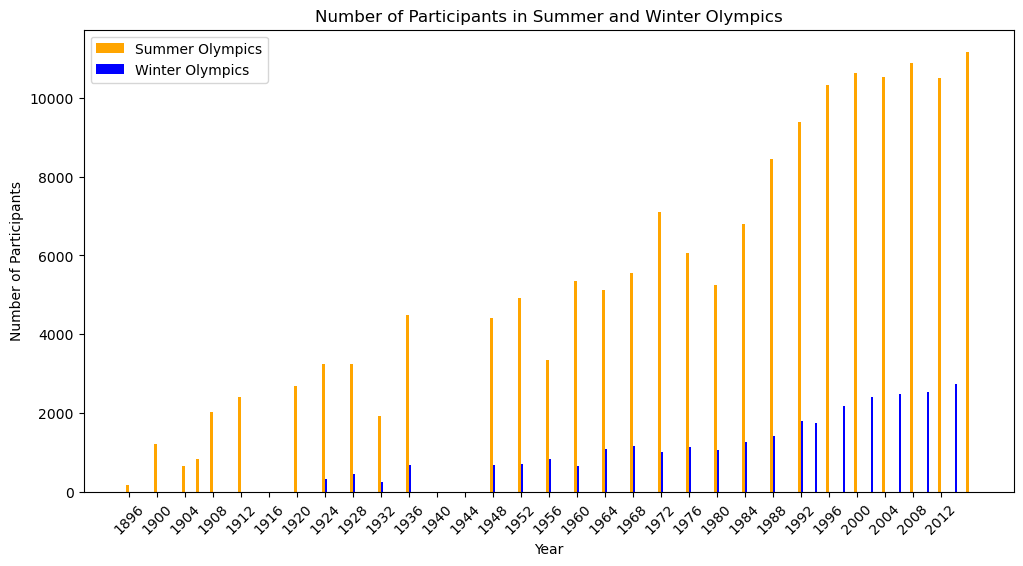

In [32]:
# Filter data for Summer and Winter Olympics
summer_winter_participants = yearly_stats[np.bitwise_or(yearly_stats['Summer'] > 0, yearly_stats['Winter'] > 0)]

# make bar plot with alternating colors for Summer and Winter Olympics
fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.4
bar_positions_summer = summer_winter_participants['Year'] - bar_width / 2
bar_positions_winter = summer_winter_participants['Year'] + bar_width / 2

ax.bar(bar_positions_summer, summer_winter_participants['Summer'], bar_width, label='Summer Olympics', color='orange')
ax.bar(bar_positions_winter, summer_winter_participants['Winter'], bar_width, label='Winter Olympics', color='blue')

ax.set_title('Number of Participants in Summer and Winter Olympics')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Participants')
ax.legend()
plt.xticks(range(1896, 2016, 4), rotation=45)

plt.show()

**Observations:** 
- The Olympics did not occur in 1916, 1940, and 1944 due to the start of WWI and WWII.
- 28 countries boycotted the 1976 games in Montreal after the International Olympic Committee (IOC) refused to exclude New Zealand from the games. 
- The United States has sent athletes to every Olympic Games with the exception of the 1980 Summer Olympics, during which it led a boycott in protest of the Soviet Union's invasion of Afghanistan. The absence of countries due to this boycott is reflected in the sharp drop in 1980.
- Both Summer and Winter games occurred each year until split into alternating years after 1992. 

### Medal Distribution:

In [33]:
# Sort top 10 countries by total medal count in descending order
top_10_countries = total_medal_count_by_country.nlargest(10)
top_10_data = year_2016_data[year_2016_data['NOC'].isin(top_10_countries.index)]

top_10_medal_count = top_10_data.groupby(['NOC', 'Medal']).size().unstack(fill_value=0)
top_10_medal_count['Total'] = top_10_medal_count.sum(axis=1)

# sort by highest gold count in descending order
top_10_medal_count = top_10_medal_count.sort_values(by='Total', ascending=False)
top_10_medal_count

NameError: name 'total_medal_count_by_country' is not defined

In [ ]:

# Filter data for the year 2016
data_2016 = athletes[athletes['Year'] == 2016]

# Filter data to include only rows with medals
medal_data_2016 = data_2016[data_2016['Medal'] != 'No Medal']

# Pivot the data to count the number of each medal type for each NOC
medals_by_noc_2016 = medal_data_2016.pivot_table(index='NOC', columns='Medal', aggfunc='size', fill_value=0)

# Calculate the total medal count for each NOC
total_medals_by_noc_2016 = medals_by_noc_2016.sum(axis=1)

# Get the top 10 NOC performers in 2016 based on total medal count
top_10_nocs_2016 = total_medals_by_noc_2016.nlargest(10)

# Select only the top 10 NOCs from the pivot table
top_10_medals_by_noc_2016 = medals_by_noc_2016.loc[top_10_nocs_2016.index]

# Normalize the data to get proportions
top_10_medals_by_noc_norm_2016 = top_10_medals_by_noc_2016.div(top_10_medals_by_noc_2016.sum(axis=1), axis=0)

# Plot the top 10 NOC performers in 2016 broken down by medal type proportions
plt.figure(figsize=(12, 8))
top_10_medals_by_noc_norm_2016.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Top 10 NOC Performers in 2016 Broken Down by Medal Type')
plt.xlabel('NOC')
plt.ylabel('Proportion of Medals')
plt.legend(title='Medal Type', bbox_to_anchor=(1, 1))
plt.show()


## Emerging Markets

In [ ]:
# Filter data for countries with non-zero medals after the year 2000
recent_medals_after_2000 = athletes[athletes['Year'] > 2000].groupby(['NOC', 'Sport'])['Received_Medal'].sum().reset_index()
recent_medals_countries_after_2000 = recent_medals_after_2000[recent_medals_after_2000['Received_Medal'] > 0]['NOC']

# Filter data for countries with zero medals before the year 2000
zero_medals_before_2000 = athletes[athletes['Year'] <= 2000].groupby('NOC')['Received_Medal'].sum().reset_index()

zero_medals_countries_before_2000 = zero_medals_before_2000[zero_medals_before_2000['Received_Medal'] == 0]['NOC']

# Identify countries that started winning medals after 2000
newly_winning_countries_after_2000 = pd.DataFrame(zero_medals_countries_before_2000[zero_medals_countries_before_2000.isin(recent_medals_countries_after_2000)])

newly_winning_countries_after_2000


In [ ]:
# Identify geographical clusters of emerging markets based on recent successes in sports.




In [ ]:
selected_noc = 'BRN'  # Can replace 'BRN' with any country code

selected_noc_data = athletes[athletes['NOC'] == selected_noc]
medal_count_by_year_sport_event = selected_noc_data.groupby(['Year','NOC', 'Medal', 'Sport', 'Sex', 'Name']).size().unstack(fill_value=0)

# total medal count for each year
total_medal_count_by_year_sport_event = medal_count_by_year_sport_event.sum(axis=1).reset_index(name='TotalMedalCount')

total_medal_count_by_year_sport_event.sort_values(by='Year', ascending=True)

In [ ]:
# Bahrain won a gold medal in 2016
brn_gold_2016 = athletes[(athletes['NOC'] == 'BRN') & (athletes['Medal'] == 'Gold') & (athletes['Year'] == 2016)]

# info about gold medalist
for index, row in brn_gold_2016.iterrows():
    print(f"Year: {row['Year']}, Name: {row['Name']}, NOC: {row['NOC']}, Age: {row['Age']}, Sport: {row['Sport']}, Event: {row['Event']}, Sex: {row['Sex']}")


In [ ]:
# ALSO LOOK AT ETHIOPIA

#Filter data for egypt and the last four Olympic Games
# ethiopia_last_four_games = athletes[(athletes['NOC'] == 'EGY') & (athletes['Year'] >= 1950) & (athletes['Year'] <= 2016)]

# Group by year and sport, count the number of medals each year for each sport
ethiopia_medals_by_year_sport = ethiopia_last_four_games.groupby(['Year', 'Sport'])['Medal'].count().reset_index()

# Create a bar plot
plt.figure(figsize=(12, 8))

# Iterate through unique sports and plot bars
for sport in ethiopia_medals_by_year_sport['Sport'].unique():
    sport_data = ethiopia_medals_by_year_sport[ethiopia_medals_by_year_sport['Sport'] == sport]
    plt.bar(sport_data['Year'], sport_data['Medal'], label=sport)

plt.title('Number of Medals Won by Egypt Each Year by Sport (Last Four Olympic Games)')
plt.xlabel('Year')
plt.ylabel('Number of Medals')

# Show legend with only the sports on the graph
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = list(set(labels))
unique_handles = [handles[labels.index(label)] for label in unique_labels]
plt.legend(unique_handles, unique_labels, title='Sport', bbox_to_anchor=(1, 1))

plt.show()


this info can be useful for an apparel company for marketing purposes
Companies involved in sports sponsorship and advertising may benefit from insights on popular sports, successful athletes, and the demographics of Olympic audiences. This information can help in strategic marketing and sponsorship decisions.
Retailers selling sports-related merchandise can use insights to stock products related to popular sports and athletes, aligning with current market trends.
Offer data-driven insights to companies involved in sports sponsorship and advertising, helping them make informed decisions on marketing strategies and sponsorships.

### Gender and Sports:

How has the participation of male and female athletes evolved over time?
Are there specific sports where one gender dominates?

In [ ]:
yearly_stats.head()

Recognize countries with a low representation of young female athletes, offering potential market insights for the campaign.

client also wants to launch a campaign empowering girls and women
identify successes in women's sports and emerging age groups worth investing in and magnifying 
can help to target more diverse consumers by age and gender 

In [ ]:
young_female_medalists = athletes[(athletes['Medal'].notnull()) & (athletes['Sex'] == 'F') & (athletes['Age'] <= 25)]

plt.figure(figsize=(8, 4))
plt.hist(young_female_medalists['Age'], bins=10, color='hotpink', edgecolor='black')
plt.title('Age Distribution of Young Female Medalists')
plt.xlabel('Age')
plt.ylabel('Number of Medalists')
plt.grid(axis='y', alpha=0.75)
plt.show()


In [ ]:
young_female_athletes = athletes[(athletes['Sex'] == 'F') & (athletes['Age'] <= 25)]

# Count number of young female athletes per country
young_female_counts = young_female_athletes['NOC'].value_counts()

#find bottom 10 countries based on participation
bottom_countries = 15  
bottom_countries_df = young_female_counts.tail(bottom_countries)

plt.figure(figsize=(8, 4))
bottom_countries_df.plot(kind='bar', color='hotpink')
plt.title('Top 15 Countries with Lowest Representation of Young Female Athletes')
plt.xlabel('Country (NOC)')
plt.ylabel('Number of Young Female Athletes')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y', alpha=0.75)
plt.show()


In [ ]:
gender_counts = summer.groupby(['Year', 'Sex'])['Name'].nunique().reset_index(name='AthleteCount') #all M and F athletes per city per year
gender_pivot = gender_counts.pivot_table(index=['Year'], columns='Sex', values='AthleteCount', fill_value=0).reset_index()

# calculate proportions
gender_pivot['Proportion_Male'] = gender_pivot['M'] / (gender_pivot['M'] + gender_pivot['F'])
gender_pivot['Proportion_Female'] = gender_pivot['F'] / (gender_pivot['M'] + gender_pivot['F'])

plt.figure(figsize=(5, 8))
plt.barh(gender_pivot['Year'], gender_pivot['Proportion_Male'], label='Male', color='blue')
plt.barh(gender_pivot['Year'], gender_pivot['Proportion_Female'], left=gender_pivot['Proportion_Male'], label='Female', color='hotpink')
plt.title('Proportion of Male and Female Athletes at Summer Olympics (1896-2016) by Year')
plt.xlabel('Proportion of Athletes')
plt.ylabel('Year')
plt.yticks(gender_pivot['Year'].unique())
plt.legend()
plt.show()

In [ ]:
# A DIFFERENT VIEW - time series edition
average_female_proportion_by_year = yearly_stats.groupby('Year')['PropFemale'].mean()

# Calculate moving average with a specified window (in this case, 4 years)
window_size = 4
moving_average = average_female_proportion_by_year.rolling(window=window_size).mean()

plt.figure(figsize=(12, 6))
plt.plot(average_female_proportion_by_year, label='Proportion of Female Athletes')
plt.plot(moving_average, label=f'Moving Average ({window_size}-Year Window)', color='red')
plt.legend()
plt.title('Trend in Proportion of Female Athletes Over the Years')
plt.xlabel('Year')
plt.ylabel('Proportion of Female Athletes (%)')  # Updated ylabel with percentage
plt.xticks(range(1896, 2017, 4), rotation=45)
plt.grid(True)

# label first and last points with percentages
first_point = average_female_proportion_by_year.iloc[1]
last_point = average_female_proportion_by_year.iloc[-1]

plt.annotate(f'{first_point:.2f}%', xy=(average_female_proportion_by_year.index[0], first_point), textcoords="offset points", xytext=(0,5), ha='left')
plt.annotate(f'{last_point:.2f}%', xy=(average_female_proportion_by_year.index[-1], last_point), textcoords="offset points", xytext=(0,5), ha='center')

plt.show()


moving avg: used to analyze data points by creating a series of averages of different subsets of the full data set. The purpose of using a moving average is to smooth out short-term fluctuations and highlight longer-term trends or cycles.

In [ ]:
# Find which year saw the largest increase in female participation by proportion 

#Create a mask for NaN values
not_nan_mask = ~np.isnan(average_female_proportion_by_year)

# Calculate differences between consecutive time points
differences = np.diff(average_female_proportion_by_year[not_nan_mask])

time_intervals = 4

# find slopes by dividing differences by time intervals
slopes = differences / time_intervals
max_slope_index = np.argmax(np.abs(slopes[~np.isnan(slopes)]))

max_slope_value = slopes[max_slope_index]

print(f"The biggest jump occurred between {average_female_proportion_by_year.index[not_nan_mask][max_slope_index]} and {average_female_proportion_by_year.index[not_nan_mask][max_slope_index + 1]}, with a slope of {max_slope_value:.4f}")


In [ ]:
# were any new sports added in 1976 that influenced this growth?

data_1972 = athletes[athletes['Year'] == 1972]
data_1976 = athletes[athletes['Year'] == 1976]

sports_1972 = set(data_1972['Event'])
sports_1976 = set(data_1976['Event'])

new_sports_1976 = sports_1976 - sports_1972

new_sports_1976
#women's bball, handball, and cross country skiing were new additions as well as Rowing and some other mixed gender sports

In [ ]:
# use seaborn package 

female_medal_data = athletes[(athletes['Sex'] == 'F') & (athletes['Medal'].notnull())]
sport_medal_counts = female_medal_data.groupby('Sport')['Medal'].count().reset_index(name='MedalCount')

sorted_sports = sport_medal_counts.sort_values(by='MedalCount', ascending=False)

top_10_sports = sorted_sports.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Sport', y='MedalCount', data=top_10_sports, palette='viridis')
plt.title('Top 10 Sports for Females by Medal Count')
plt.xlabel('Sport')
plt.ylabel('Medal Count')
plt.xticks(rotation=60)

plt.show()


In [ ]:
# female success since 2000
female_data_since_2000 = athletes[(athletes['Sex'] == 'F') & (athletes['Year'] >= 2000)]

medal_count_by_age_group = female_data_since_2000.groupby(['Age', 'Medal']).size().unstack(fill_value=0)

medal_count_by_age_group.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Medal Distribution by Age for Female Athletes (2000-2016)')
plt.xlabel('Age')
plt.ylabel('Number of Medals')
plt.legend(title='Medal')
plt.show()


In [ ]:
# Finding top performing female athletes in 2016

female_athletes_2016 = athletes[(athletes['Sex'] == 'F') & (athletes['Year'] == 2016)]

athlete_medal_counts = female_athletes_2016.groupby(['Name', 'Age', 'Sport', 'NOC'])['Medal'].count()

top_female_athletes = athlete_medal_counts.nlargest(5).reset_index(name='Medal Count')

print("Top 5 performing female athletes in 2016:")
top_female_athletes


In [ ]:
# Youngest females to win medals in 2016
female_medalists_2016 = athletes[(athletes['Sex'] == 'F') & (athletes['Medal'].notnull()) & (athletes['Year'] == 2016)]

# Group data by athlete and count the number of medals for each
female_athlete_medal_counts = female_medalists_2016.groupby(['Name', 'Age', 'NOC', 'Sport', 'Medal']).size().reset_index(name='Medal Count')

# Sort the data by Medal Count in descending order and then by Age in ascending order
sorted_female_athletes = female_athlete_medal_counts.sort_values(by=['Medal Count', 'Age'], ascending=[False, True])

# Drop duplicates based on 'Name'
unique_female_medalists = sorted_female_athletes.drop_duplicates(subset=['Name'], keep='first')

# Select the top 10 youngest female athletes who won medals
top_10_youngest_female_medalists = unique_female_medalists.nsmallest(10, 'Age')

print("Top 10 youngest and unique female athletes who won medals in 2016:")
top_10_youngest_female_medalists


In [ ]:
# Assuming df is your DataFrame with columns 'Sex', 'Medal', 'Sport', 'NOC', and 'Year'
# Replace column names with the actual names in your dataset

# Filter data for female athletes from Japan who won medals in table tennis
japan_female_table_tennis_medalists = athletes[
    (athletes['Sex'] == 'F') & 
    (athletes['Medal'].notnull()) & 
    (athletes['Sport'] == 'Table Tennis') & 
    (athletes['NOC'] == 'JPN')
]

# Find the first female athlete to win a medal in table tennis from Japan
first_female_table_tennis_medalist = japan_female_table_tennis_medalists.sort_values(by='Year').iloc[0]

print("First female athlete from Japan to win a medal in table tennis:")
first_female_table_tennis_medalist

In [ ]:
# Youngest Female Athlete to participate in 2016, no medal
female_athletes_since_2000 = athletes[(athletes['Sex'] == 'F') & (athletes['Year'] == 2016)]

youngest_female_athlete_since_2000 = female_athletes_since_2000.loc[female_athletes_since_2000['Age'].idxmin()]

print("Youngest Female Athlete in 2016:")
youngest_female_athlete_since_2000[['Name', 'Age', 'NOC','Sport', 'Event', 'Year', 'Medal']]

young athletes are the future! many young girls look up to olympians and medalists their age and get inspired. a partnership with the NOC or sponsorship for specific team or athlete that represents this hope for bright girls and women would be a strategic move

### Evolution of Sports:

How has the number of sports and events changed over different Olympic editions?
Are there sports that were present in the early years but are no longer part of the Olympics?

In [ ]:
# Create a DataFrame with all years from 1896 to 2016
all_years = pd.DataFrame({'Year': range(1896, 2017, 4)})

# Merge with the existing data to fill missing years with NaN values
merged_df = pd.merge(all_years, athletes, on='Year', how='left')

# Set 'Sport' and 'Event' columns to NaN for the years where data was not available
merged_df[['Sport']] = merged_df[['Sport']].where(merged_df['Year'].isin(athletes['Year']))

# Group data by 'Year' and count the number of unique sports and events each year
sports_count_by_year = merged_df.groupby('Year')['Sport'].nunique()

# Plotting the line chart for both sports and events
plt.figure(figsize=(12, 6))
plt.plot(sports_count_by_year, marker='o', label='Number of Sports', color='green', linestyle='-', linewidth=2)

plt.title('Trend in Number of Sports Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.legend()

plt.xticks(range(1896, 2017, 4), rotation=45)

plt.show()


In [ ]:
# sports added since 2000



### Who's on top?
Top Performing Athletes:

Identify and list athletes with the highest medal counts.

In [ ]:
data_2016 = athletes[athletes['Year'] == 2016]

athlete_medal_count = data_2016.groupby(['NOC', 'Name'])['Received_Medal'].count().reset_index(name='TotalMedals')

top_athletes_2016 = athlete_medal_count.sort_values(by='TotalMedals', ascending=False)

top_athletes_2016.head(10)


### Host or not?
knowing this can help with predicting where to target and plan before olympics occur. 
we can try to do predictive modeling here for 2024 paris (like how many medals we think france will have)

In [ ]:
def plot_top_performances(selected_country, top_n=10):

    country_data = athletes[athletes['NOC'] == selected_country]
    
    medal_count_by_year_city = country_data.groupby(['Year', 'City', 'Medal']).size().unstack(fill_value=0)

    total_medal_count_by_year_city = medal_count_by_year_city.sum(axis=1)

    top_performances = total_medal_count_by_year_city.nlargest(top_n)

    plt.figure(figsize=(12, 8))
    medal_count_by_year_city.loc[top_performances.index].plot(kind='bar', stacked=False)

    plt.title(f'Top {top_n} Performances by Overall Medal Count for {selected_country}')
    plt.xlabel('Year and City')
    plt.ylabel('Medal Count by Type')
    plt.legend(title='Medal Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=60)
    plt.show()

# Examples:
plot_top_performances(selected_country='GRE', top_n=10)
plot_top_performances(selected_country='USA', top_n=10)
plot_top_performances(selected_country='CHN', top_n=10)
plot_top_performances(selected_country='ESP', top_n=10)
plot_top_performances(selected_country='CAN', top_n=10)
plot_top_performances(selected_country='FRA', top_n=10)

these graphs are sorted in descending order with largest # of medals won on the left. most gold won at LA and Atlanta. but most overall was in St. Louis, all in the USA we can assume that France might win the most medals this year based on the host city being Paris

Time Series Analysis:

data includes a temporal component, perform time series analysis to detect trends and seasonality.
Use methods like moving averages, exponential smoothing, or autoregressive integrated moving average (ARIMA) to identify patterns over time.

Statistical Analysis:

Apply statistical methods to detect significant changes in your data.
Conduct hypothesis testing to determine if there are statistically significant differences between different time periods or groups.

In [ ]:
# Filter data for the selected country and sport (modify as needed)
selected_country = 'USA'
selected_sport = 'Swimming'
filtered_data = athletes[(athletes['NOC'] == selected_country) & (athletes['Sport'] == selected_sport)]

# Group data by 'Year' and count the total number of medals each year
medal_count_by_year = filtered_data.groupby('Year')['Received_Medal'].count()

# Calculate the moving average with a specified window (e.g., 4 years)
window_size = 4
moving_average = medal_count_by_year.rolling(window=window_size).mean()

# Plotting the original time series and moving average
plt.figure(figsize=(12, 6))
plt.plot(medal_count_by_year, label=f'{selected_country} - {selected_sport} Medal Count')
plt.plot(moving_average, label=f'Moving Average ({window_size}-Year Window)', color='red')
plt.legend()
plt.title(f'{selected_country} - {selected_sport} Medal Count and Moving Average')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.grid(True)
plt.show()


tracks average number of medals in specific sport over time 

In [ ]:
# Filter data for the selected country and sport (modify as needed)
selected_country = 'BRN'
selected_sport = 'Athletics'
filtered_data = athletes[(athletes['NOC'] == selected_country) & (athletes['Sport'] == selected_sport)]

# Group data by 'Year' and count the number of participants each year
participants_count_by_year = filtered_data.groupby('Year')['Name'].nunique()

# Calculate the moving average with a specified window (e.g., 4 years)
window_size = 4
moving_average = participants_count_by_year.rolling(window=window_size).mean()

# Plotting the original time series and moving average
plt.figure(figsize=(12, 6))
plt.plot(participants_count_by_year, label=f'{selected_country} - {selected_sport} Participants Count')
plt.plot(moving_average, label=f'Moving Average ({window_size}-Year Window)', color='red')
plt.legend()
plt.title(f'{selected_country} - {selected_sport} Participants Count and Moving Average')
plt.xlabel('Year')
plt.ylabel('Number of Participants')
plt.grid(True)
plt.show()


**Observations:**
- BRN athlete count is moving up, coincides with recent wins


### Future angles, time permitting:
Implement machine learning models for anomaly detection or clustering to identify unusual patterns in the data.
Train models to predict future trends based on historical data.
obtain more up-to-date or recent data to improve accuracy of trends, analysis, and predictions

- more recent data can help in identifying up and coming athletes to partner with since there is a chance former athletes from 2016 have already retired
- population data to gauge interest in products
- GDP and other economic data to assess development and answer questions of correlation with olympics success

time series forecasting 

In [ ]:
# predicting medal count 